In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color="Blue"> Loading the data set </font>

In [2]:
df=pd.read_csv('equip_failures_training_set.csv')

### <font color="blue"> Displaying the first five observations of the data set </font>


In [3]:
df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df.shape

(60000, 172)

### <font color="blue"> The data has 172 sensor columns

In [5]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

In [6]:
df.columns

Index(['id', 'target', 'sensor1_measure', 'sensor2_measure', 'sensor3_measure',
       'sensor4_measure', 'sensor5_measure', 'sensor6_measure',
       'sensor7_histogram_bin0', 'sensor7_histogram_bin1',
       ...
       'sensor105_histogram_bin2', 'sensor105_histogram_bin3',
       'sensor105_histogram_bin4', 'sensor105_histogram_bin5',
       'sensor105_histogram_bin6', 'sensor105_histogram_bin7',
       'sensor105_histogram_bin8', 'sensor105_histogram_bin9',
       'sensor106_measure', 'sensor107_measure'],
      dtype='object', length=172)

### <font color="blue"> countplot for target variable 


Text(0, 0.5, 'Number of Records')

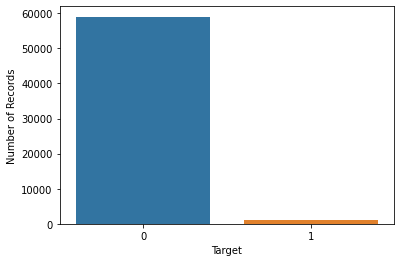

In [7]:
sns.countplot(x='target', data = df)
plt.xlabel('Target')
plt.ylabel('Number of Records')

### <font color="blue">  we can see that we have imbalanced data for the target variable  . 

### <font color="blue"> Here we balance the data using class weights class_weight='balanced'

## <font color="Red"> Exploratory Data Analysis[EDA]

In [8]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

### <font color="blue">  to convert the data type into float we should handle missing values first 

### <font color="blue"> checking and Treating  missing values 

In [9]:
df.isna().sum()

id                          0
target                      0
sensor1_measure             0
sensor2_measure             0
sensor3_measure             0
                           ..
sensor105_histogram_bin7    0
sensor105_histogram_bin8    0
sensor105_histogram_bin9    0
sensor106_measure           0
sensor107_measure           0
Length: 172, dtype: int64

### <font color="blue"> Replacing string 'na' with NaN values

In [10]:
df = df.replace('na',np.nan)

In [11]:
df.isna().sum()

id                              0
target                          0
sensor1_measure                 0
sensor2_measure             46329
sensor3_measure              3335
                            ...  
sensor105_histogram_bin7      671
sensor105_histogram_bin8      671
sensor105_histogram_bin9      671
sensor106_measure            2724
sensor107_measure            2723
Length: 172, dtype: int64

### <font color="blue"> Visual representation of missing ratio percentage

In [12]:
def plot_null(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

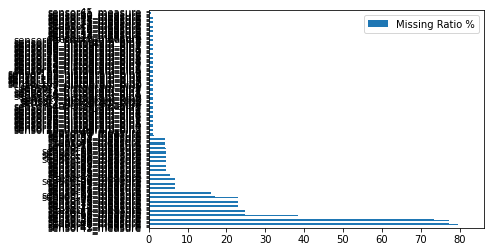

In [13]:
plot_null(df)
plot_width, plot_height = (30,15)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [14]:
df_null=df.isnull().sum() / len(df) * 100
df_null.sort_values(ascending=False)[:15]

sensor43_measure    82.106667
sensor42_measure    81.203333
sensor41_measure    79.566667
sensor40_measure    77.221667
sensor68_measure    77.215000
sensor2_measure     77.215000
sensor39_measure    73.348333
sensor38_measure    65.915000
sensor37_measure    45.461667
sensor36_measure    38.390000
sensor56_measure    24.768333
sensor57_measure    24.768333
sensor58_measure    24.768333
sensor65_measure    24.768333
sensor4_measure     24.768333
dtype: float64

### <font color="blue"> Removing columns which mostly have null values - more than 50%

In [15]:
df.drop(columns=['sensor43_measure', 'sensor42_measure', 'sensor41_measure', 'sensor40_measure', 'sensor68_measure','sensor2_measure','sensor39_measure', 'sensor38_measure', ], axis=1, inplace = True)

In [16]:
df.shape

(60000, 164)

### <font color="blue"> Replacing NaN with median values

### <font color="indigo">  Since most of the obeservations in each sensor measure is close to 0 and rest of the observations have an extremely high value, imputing missing values using mean would result in incorrect high values. Hence we choose to impute the missing values using the median of each column

For most of the features, the percentage of NULL values are in the range of 0 to 20 percent of their data
A very small majority of the features have NULL values in the percentage of 50 to 80 of their data.
These features might be redundant or do not have much information which might contribute towards the training of the model.
Those features can be dropped during the data preprocessing stage.

In [17]:
for col in df.columns:
    if col not in ['id','target']:
        df[col] = df[col].fillna(df[col].median())

In [18]:
plot_null(df)

No NAs found


### <font color="blue"> Converting all measures to numerical data type 

In [19]:
for col in df.columns:
    if col not in ['id', 'target']:
        df[col] = df[col].astype(np.float)

In [20]:
df.dtypes

id                            int64
target                        int64
sensor1_measure             float64
sensor3_measure             float64
sensor4_measure             float64
                             ...   
sensor105_histogram_bin7    float64
sensor105_histogram_bin8    float64
sensor105_histogram_bin9    float64
sensor106_measure           float64
sensor107_measure           float64
Length: 164, dtype: object

In [21]:
x=df

### <font color="blue"> Checking the columns which have less than 3 unique values across the data set because columns with constant values do not support our model's prediction

### <font color="indigo"> Checking for unique values in each column in full dataset

<Figure size 12960x720 with 0 Axes>

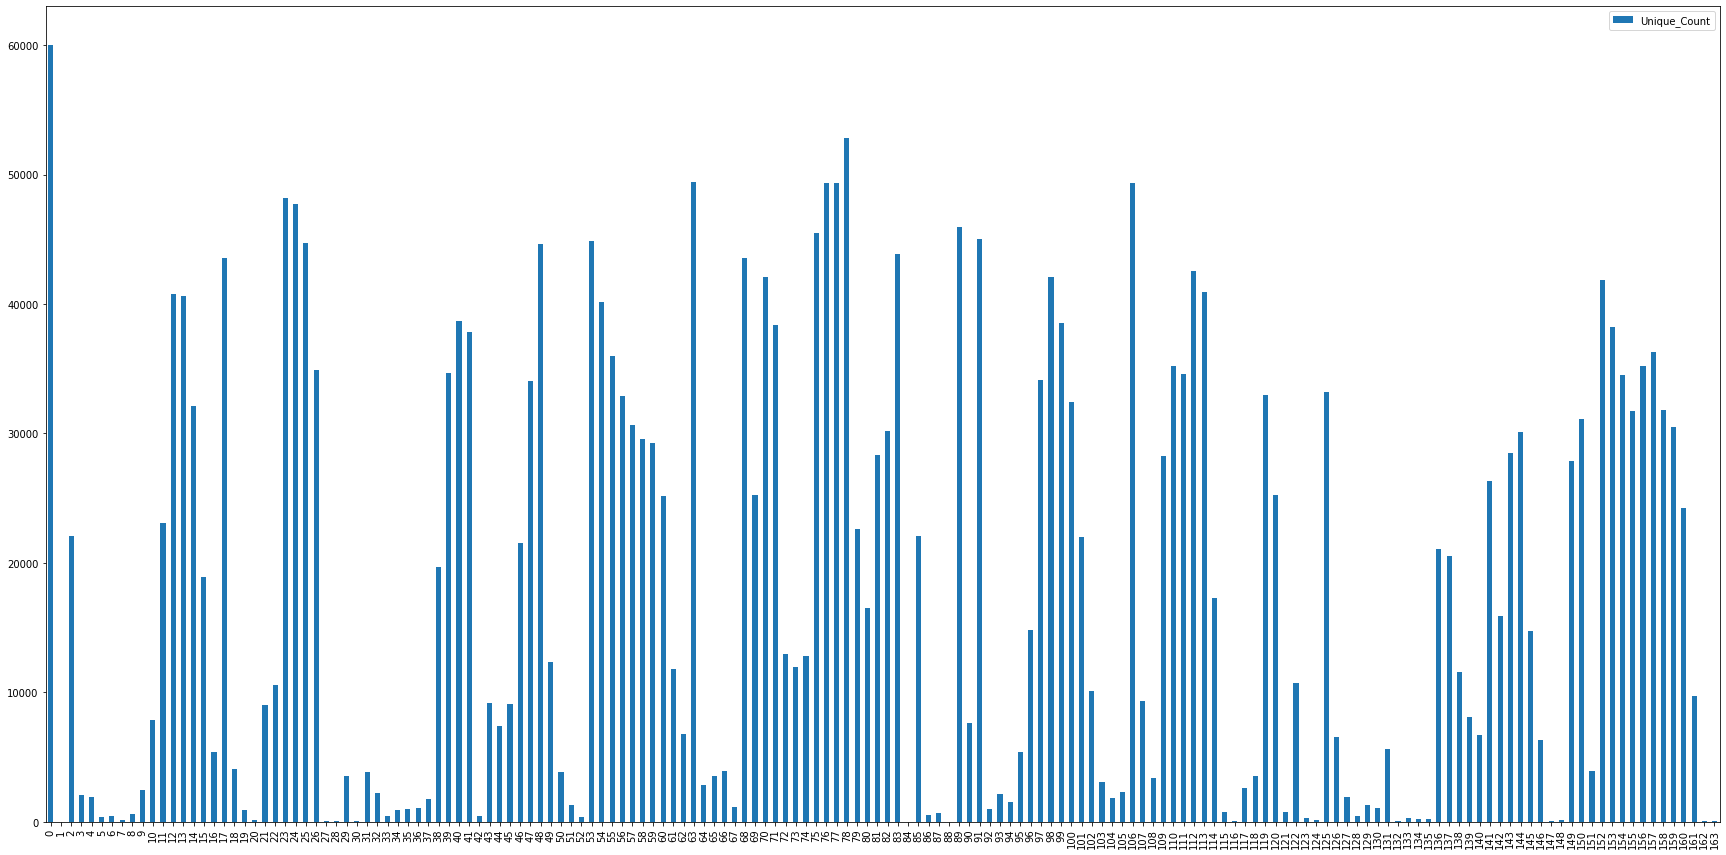

In [22]:
unique_data = df.nunique().reset_index()
unique_data.columns = ['Name','Unique_Count']
plt.figure (figsize = (180,10))
unique_data.plot(kind='bar')
plot_width, plot_height = (16,28)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [23]:
unique_data

,Name,Unique_Count
0,id,60000
1,target,2
2,sensor1_measure,22095
3,sensor3_measure,2061
4,sensor4_measure,1886
...,...,...
159,sensor105_histogram_bin7,30469
160,sensor105_histogram_bin8,24213
161,sensor105_histogram_bin9,9724
162,sensor106_measure,28


### <font color="blue"> Checking the columns which have less than 3 unique values across the data set because columns with constant values do not support our model's prediction

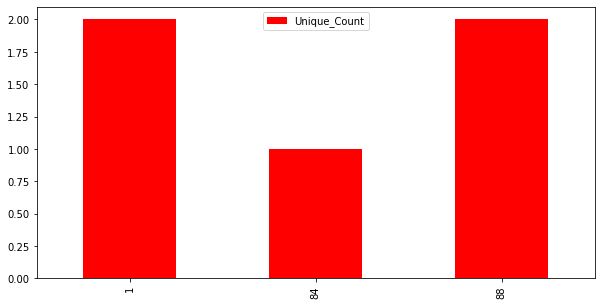

In [59]:
unique_data[unique_data.Unique_Count<=3].plot(kind='bar',color="r")

plot_width, plot_height = (5,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [25]:
unique_data[unique_data.Unique_Count<=3]

,Name,Unique_Count
1,target,2
84,sensor54_measure,1
88,sensor58_measure,2


### <font color="blue"> Dropping sensor54_measure, 'sensor58_measure', as it has constant values

In [26]:
df.drop(columns=['sensor54_measure','sensor58_measure',], axis=1, inplace=True)

In [27]:
df.shape

(60000, 162)

In [28]:
df.describe(include="all")

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,30000.500000,0.016667,5.933650e+04,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,17320.652413,0.128020,1.454301e+05,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,15000.750000,0.000000,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,30000.500000,0.000000,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,45000.250000,0.000000,4.866800e+04,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,60000.000000,1.000000,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


### <font color="blue">Dropping features having more than 65% of their data points as 0

In [29]:
redundant=[]
print("These features have more than or equal to 90% of their datapoints as 0 which does not contribute much to training :")
for i in df.columns:
    if (df[i]==0).sum()>54000 and i!='target':
        #df.drop(i,inplace=True,axis=1)
        redundant.append(i)
        print(i)

These features have more than or equal to 90% of their datapoints as 0 which does not contribute much to training :
sensor5_measure
sensor6_measure
sensor7_histogram_bin0
sensor7_histogram_bin1
sensor7_histogram_bin2
sensor9_measure
sensor11_measure
sensor18_measure
sensor19_measure
sensor20_measure
sensor21_measure
sensor24_histogram_bin0
sensor24_histogram_bin1
sensor24_histogram_bin2
sensor24_histogram_bin3
sensor24_histogram_bin4
sensor24_histogram_bin9
sensor25_histogram_bin8
sensor25_histogram_bin9
sensor64_histogram_bin0
sensor69_histogram_bin9
sensor76_measure
sensor81_measure
sensor82_measure
sensor85_measure
sensor86_measure
sensor87_measure
sensor88_measure
sensor100_measure
sensor101_measure
sensor106_measure
sensor107_measure


### <font color="blue">Having many zeroes implies that there is less variability among the features.Less variability implies that there isn't much information for the model to learn from the feature.

In [30]:
df.shape

(60000, 162)

###  <font color="blue">Correlation Matrix used to understand relationship between two or more continuous variables

In [31]:
df.corr()

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
id,1.000000,-0.012163,-0.008329,0.000468,0.003766,0.001876,0.000497,-0.002419,-0.006330,-0.007714,...,-0.010557,-0.009704,-0.009256,-0.005130,-0.004598,0.000300,-0.001446,0.004272,0.001608,-0.001052
target,-0.012163,1.000000,0.536978,-0.050996,-0.000530,0.005541,0.016250,0.012353,0.191084,0.339956,...,0.444082,0.429014,0.416195,0.485831,0.415300,0.160284,0.235401,0.115925,0.013650,0.012809
sensor1_measure,-0.008329,0.536978,1.000000,-0.063876,-0.001590,0.043095,0.062855,0.018549,0.142645,0.284797,...,0.732449,0.736321,0.715000,0.724399,0.724102,0.603888,0.469836,0.247149,0.012409,0.024387
sensor3_measure,0.000468,-0.050996,-0.063876,1.000000,-0.001765,-0.004250,-0.009480,0.017155,-0.007334,-0.022708,...,-0.046891,-0.040157,-0.039319,-0.039648,-0.047105,-0.048648,-0.003714,0.013764,-0.006262,0.014747
sensor4_measure,0.003766,-0.000530,-0.001590,-0.001765,1.000000,-0.000168,-0.000209,-0.000043,-0.000115,-0.000230,...,-0.001527,-0.001529,-0.001494,-0.001239,-0.001201,-0.000801,-0.001235,-0.000716,-0.000082,-0.000096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sensor105_histogram_bin7,0.000300,0.160284,0.603888,-0.048648,-0.000801,0.035503,0.047858,0.000329,0.044185,0.182701,...,0.455031,0.447002,0.437894,0.380114,0.546124,1.000000,0.225378,0.061805,-0.001733,0.000398
sensor105_histogram_bin8,-0.001446,0.235401,0.469836,-0.003714,-0.001235,-0.009632,-0.012347,-0.000787,0.004927,0.009562,...,0.454112,0.481672,0.459834,0.407250,0.374332,0.225378,1.000000,0.710167,-0.005963,-0.002842
sensor105_histogram_bin9,0.004272,0.115925,0.247149,0.013764,-0.000716,-0.007218,-0.008996,-0.001209,-0.004274,-0.009410,...,0.228527,0.239576,0.224931,0.190958,0.164162,0.061805,0.710167,1.000000,-0.003439,-0.000971
sensor106_measure,0.001608,0.013650,0.012409,-0.006262,-0.000082,0.070869,0.106312,-0.000078,0.001793,0.006870,...,0.003657,0.011816,0.003236,0.032363,0.004613,-0.001733,-0.005963,-0.003439,1.000000,0.282201


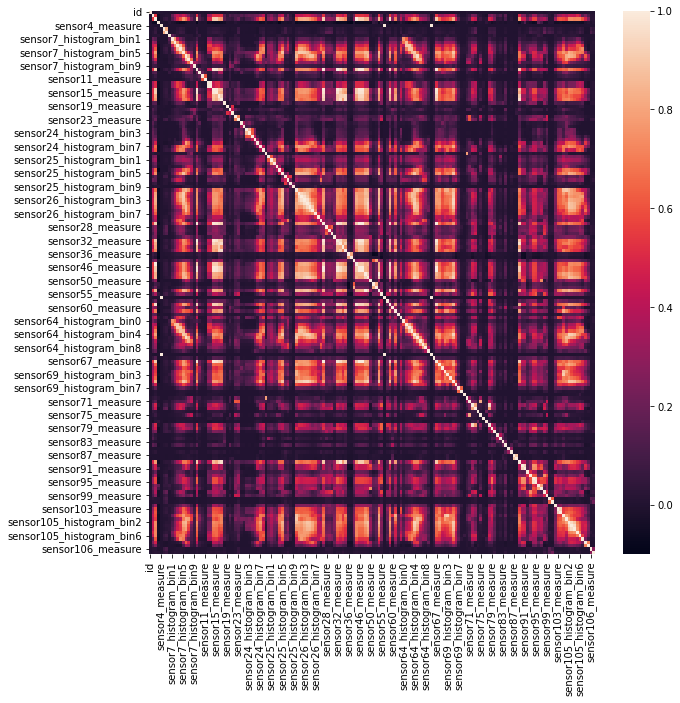

In [32]:
matrix = df.corr() #Methods method = 'spearman'

#Heat Map - Visual representation of the correlation plot

sns.heatmap(matrix)

plt.show()

plot_width, plot_height = (30,30)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

## <font color="Red"> Model fitting 

In [33]:
df.head()

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2,0,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3,0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4,0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5,0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [34]:
#Evaluation and HYpertuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

X=df.drop(['id','target'],axis=1)
y=df.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1000)

In [35]:
X_train.shape

(48000, 160)

In [36]:
X_test.shape

(12000, 160)

In [37]:
y_test.shape

(12000,)

In [38]:
y_train.shape

(48000,)

In [39]:
#classification algorithms
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression().fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, n_jobs=4,random_state=0).fit(X_train, y_train)


In [40]:
lr_score=f1_score(lr1.predict(X_train),y_train)
rf_score=f1_score(rf1.predict(X_train),y_train)


In [41]:
print("logistic regression train score: %f" % lr_score)
print("random forest train score: %f" % rf_score)

logistic regression train score: 0.610932
random forest train score: 1.000000


In [42]:
lr1_score=f1_score(lr1.predict(X_test),y_test)
rf1_score=f1_score(rf1.predict(X_test),y_test)


In [43]:
print("logistic regression test score: %f" % lr1_score)
print("random forest test score: %f" % rf1_score)

logistic regression test score: 0.598187
random forest test score: 0.741641


In [44]:
y_pred = rf1.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[11793    21]
 [   64   122]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11814
           1       0.85      0.66      0.74       186

    accuracy                           0.99     12000
   macro avg       0.92      0.83      0.87     12000
weighted avg       0.99      0.99      0.99     12000



# The overall accuracy of the model is 74%. <br>
The precision and recall percentage for each class are high and range from 94% to 97% with a
balanced class instances in each group.<br>
It is possible to improve the accuracy of this model by changing some of the fine-tuning parameters discussed either manually or using a grid search optimization (recommended approach).

In [46]:
Prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
Prediction

,Actual,Predicted
50767,0,0
2693,0,0
943,0,0
29296,0,0
4605,0,0
...,...,...
10433,0,0
34793,0,0
39606,0,0
8080,0,0


## Important Variables

In [47]:
# Sort the feature importance in descending order
importances = rf1.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [48]:
importances = list(rf1.feature_importances_)
feature_list=X_train.columns
d = {'FeatureLabels':feature_list,'Importances':importances} # dictionary data type

df1=pd.DataFrame(d)
df1.sort_values(['Importances'], ascending=False)[:10]


,FeatureLabels,Importances
7,sensor7_histogram_bin2,0.039666
69,sensor35_measure,0.037006
75,sensor47_measure,0.035066
85,sensor59_measure,0.032969
24,sensor17_measure,0.030514
87,sensor61_measure,0.027276
20,sensor13_measure,0.024888
6,sensor7_histogram_bin1,0.024821
19,sensor12_measure,0.019505
132,sensor89_measure,0.019269


## prediction on unseen data using RF for important variables

In [49]:
a=df[['sensor35_measure','sensor61_measure','sensor13_measure','sensor12_measure','sensor17_measure','sensor59_measure','sensor105_histogram_bin5','sensor89_measure','sensor47_measure','sensor45_measure']]
b=df['target']

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=0).fit(a, b)

In [51]:
df1=pd.read_csv('equip_failures_test_set.csv')
df1.head()

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,na,2130706438,332,0,0,0,0,0,...,544762,504820,1597028,631494,5644,5448,11096,1982,0,0
1,2,91122,na,na,na,0,0,0,0,0,...,696774,345742,939332,943744,504048,203698,287374,36566,0,0
2,3,218924,na,na,na,na,na,0,280,119070,...,1032974,866000,1645644,1154924,3549128,1550716,15900,0,na,na
3,4,16,0,30,28,0,0,0,0,0,...,70,24,40,12,56,0,0,0,0,0
4,5,39084,na,1054,1032,0,0,0,0,0,...,276304,123720,225722,281462,295244,256146,241074,2372,0,0


In [52]:
new=df1[['sensor35_measure','sensor61_measure','sensor13_measure','sensor12_measure','sensor17_measure','sensor59_measure','sensor105_histogram_bin5','sensor89_measure','sensor47_measure','sensor45_measure']]
new.head()

,sensor35_measure,sensor61_measure,sensor13_measure,sensor12_measure,sensor17_measure,sensor59_measure,sensor105_histogram_bin5,sensor89_measure,sensor47_measure,sensor45_measure
0,1026922,621043.2,0,0,1359980,3843046.08,631494,77968,4640530,66888.9
1,564314,583557.12,0,0,525024,5635891.2,943744,47748,6545108,91121.51
2,1613280,1113039.36,1351044,804746,1135476,11158955.52,1154924,na,na,218924.54
3,1794,2857.92,0,0,712,3103.68,12,198,32934,15.38
4,295666,283138.56,0,0,228912,2111437.44,281462,22874,2806880,39083.66


In [53]:
new.shape

(16001, 10)

In [54]:
# Replacing string 'na' with NaN values

new = new.replace('na',np.nan)

# Replacing NaN with median values

for col in new.columns:
    if col not in ['id']:
        new[col] = new[col].fillna(new[col].median())

In [55]:
y_pred = rf2.predict(new)

In [56]:
Prediction=pd.DataFrame({'Predicted':y_pred})
Prediction

,Predicted
0,0
1,0
2,0
3,0
4,0
...,...
15996,0
15997,0
15998,0
15999,0


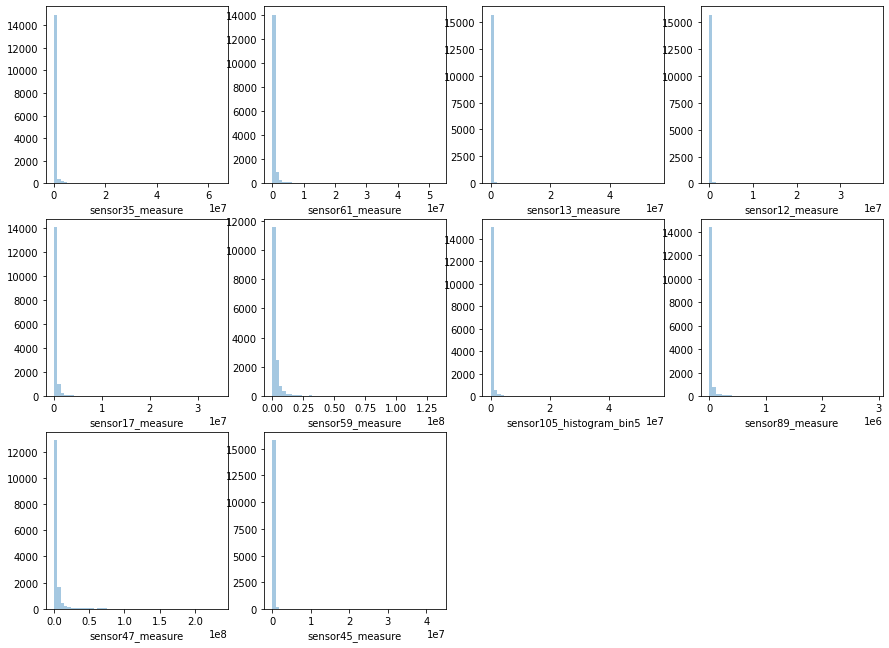

In [57]:
col = new.columns
plt.figure (figsize = (15,15))
for i in range (len(col)):
    plt.subplot(4,4,i+1)
    ax = sns.distplot(new[col[i]], kde = False)
    ax.autoscale()
plt.show()